In [428]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

# def load_pickle(fname):
#     with open(fname, "rb") as fp:
#         return pkl.load(fp)

from importlib import reload
import visu
import utils

import oscdetector as od

from PIL import Image

reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

In [178]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

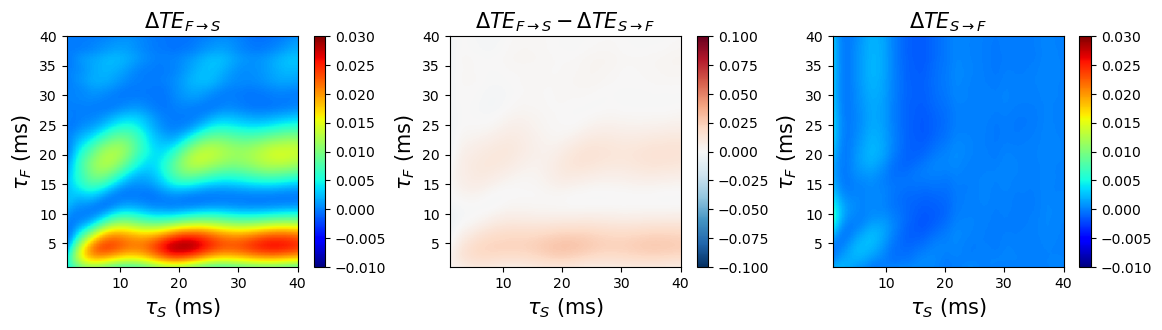

In [427]:
te_data_2d = utils.load_pickle("./data/te_2d_mua/te_100.pkl")
fig = visu.show_te_summary_2d(te_data_2d, vmax=0.03, vmin=-.01, vdmax=0.1)

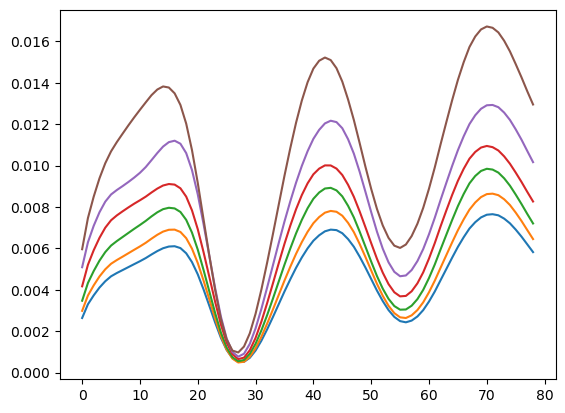

In [222]:
plt.figure()
# for ntp in range(2):
for n in [80, 70, 60, 50, 40, 30]:
    plt.plot(te_data_2d["te"][:,ntp,:n,:].mean(axis=1).mean(axis=0))


In [ ]:
plt.figure()
# for ntp in range(2):
for n in [80, 70, 60, 50, 40]:
    plt.plot(te_data_2d["te"][:,ntp,:,:n].mean(axis=2).mean(axis=0))


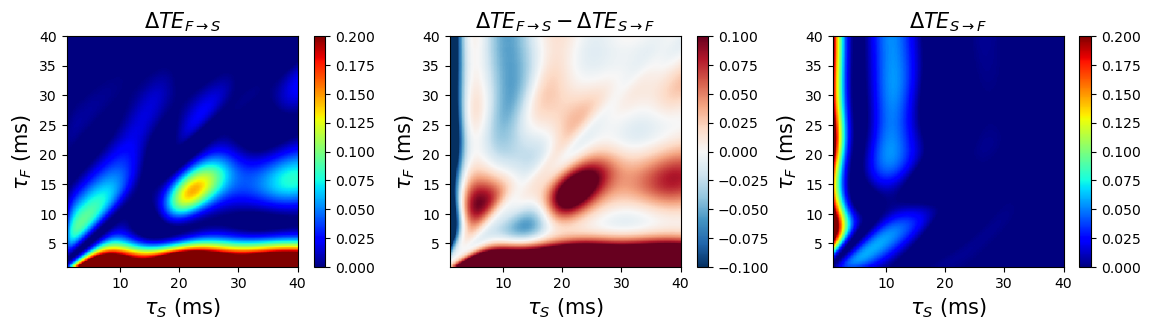

In [186]:
te_data_2d = utils.load_pickle("./data/te_2d/te_304.pkl")
fig = visu.show_te_summary_2d(te_data_2d, vmax=0.2, vmin=0, vdmax=0.1)

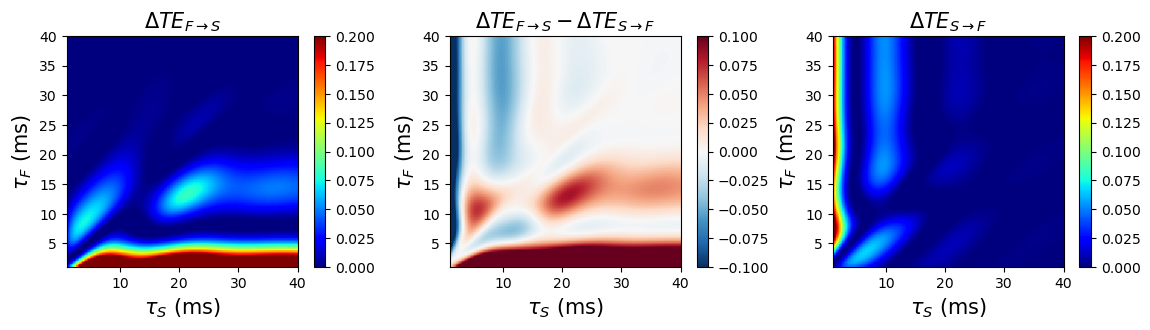

In [188]:
te_data_2d = utils.load_pickle("./data/te_2d/te_300.pkl")
fig = visu.show_te_summary_2d(te_data_2d, vmax=0.2, vmin=0, vdmax=0.1)

In [191]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

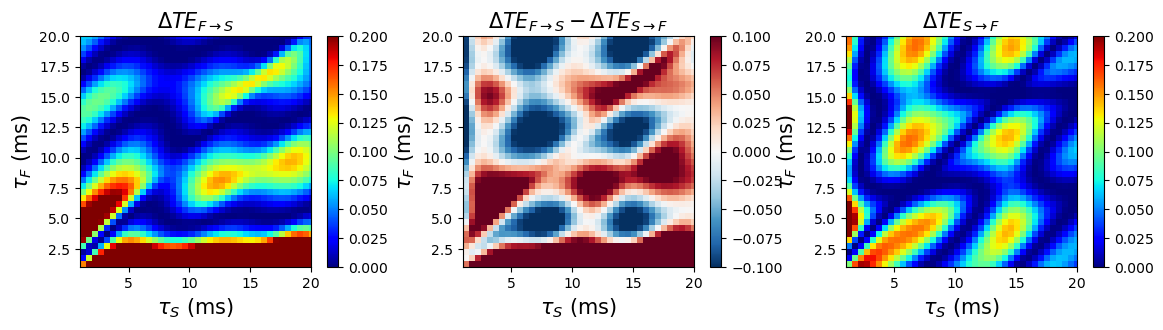

In [193]:
te_data_2d = utils.load_pickle("./data/te_2d/te_.pkl")
fig = visu.show_te_summary_2d(te_data_2d, vmax=0.2, vmin=0, vdmax=0.1, tl=(1, 20))

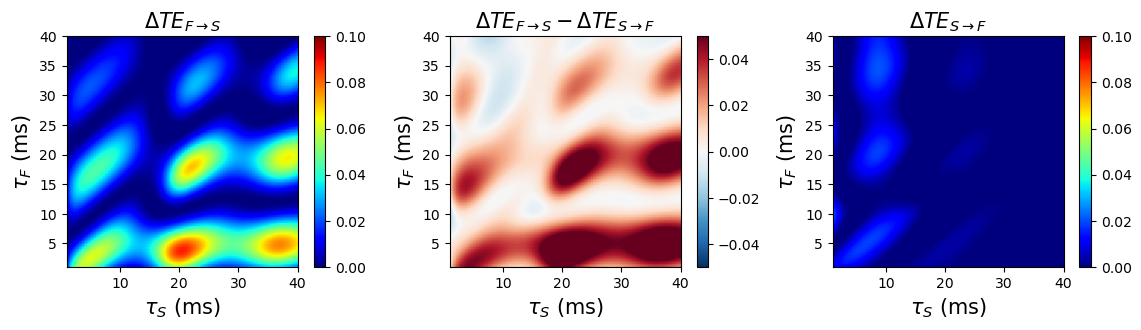

In [468]:
te_data_2d = utils.load_pickle("./data/te_2d/te_106.pkl")
fig = visu.show_te_summary_2d(te_data_2d, vmax=0.1, vmin=0, vdmax=0.05, tl=(1, 40))

In [477]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

In [549]:
te_data_2d = utils.load_pickle("./data/te_2d/te_400.pkl")

In [550]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

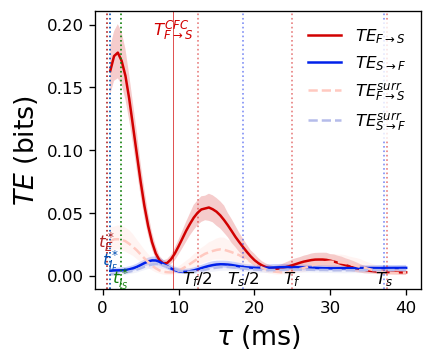

In [551]:
te_data = utils.reduce_te_2d(te_data_2d)

visu.show_te_summary(te_data)
yl = plt.gca().get_ylim()
visu.draw_syn_indicator(yl)
visu.draw_freq_indicator(1, yl)
visu.draw_cfc_indicator(1, yl)
# plt.vlines(1e3/33/8, yl[0], yl[1], linestyle='--', color='k', lw=1)

In [31]:
orders = [0, 2, 10, 6, 14, 4, 5, 7, 15, 8, 13]

def gen_background(dpi=200):
    
    we = 0.01
    wc = 0.025
    wl = 0.01
    num_c = 8

    fig = plt.figure(figsize=(16, 9), dpi=dpi)

    # boundaries
    w = 1 - we*2 - wc
    h = 1 - (we + wc)
    dw = w / len(orders)

    for n in range(len(orders)):
        plt.axes(position=(we+wc+dw*n, h, dw, wc))
        lb = od.get_motif_labels()[orders[n]]
        plt.text(0.5, 0.5, lb, va="center", ha="center", fontsize=12)
        plt.xticks([])
        plt.yticks([])

    # h = 1 - (2*we + wc)
    dh = (h - we) / num_c
    for n in range(num_c):
        # plt.axes(position=(we, 1-we-wc-dh*(n+1), wc, dh))
        plt.axes(position=(we, 1-we-wc-dh*(n+1), wc, dh))
        lb = "%d"%(n+1)
        plt.text(0.5, 0.5, lb, va="center", ha="center", fontsize=16)
        plt.xticks([])
        plt.yticks([])

    # generate axis
    wtot = 1 - 2*we - wc
    htot = 1 - 2*we - wc

    dw = wtot/len(orders)
    dh = htot/num_c
    
    coords = []

    for nc in range(num_c):
        coords.append([])
        h0 = 1 - we - wc - dh*(nc+1)
        for i in range(len(orders)):
            w0 = we + wc + dw*i

            plt.axes(position=(w0, h0, dw, dh))
            plt.xticks([]); plt.yticks([])
            
            coords[-1].append((w0, h0, dw, dh))

            # plt.axes(position=(w0+wl, h0+wl, dw-2*wl, dh-2*wl))
            
    return fig, coords




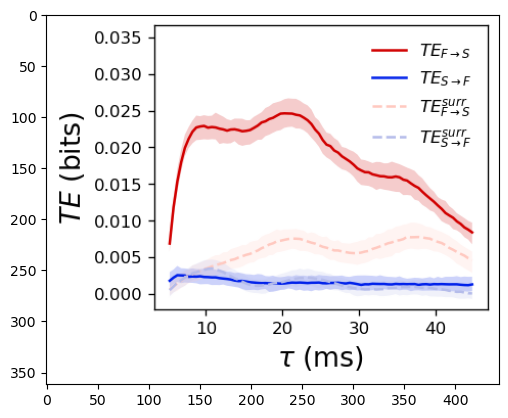

In [11]:
plt.imshow(im)

In [41]:
!mkdir figs/te_naive_1

In [47]:
reload(utils)

<module 'utils' from '/home/jungyoung/Project/hh_neuralnet/information_routing/utils.py'>

In [50]:
te_data_2d = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(1, 0)))
te_data = utils.reduce_te_2d(te_data_2d)

In [52]:
te_data["te"].shape, te_data["te_surr"].shape

((200, 2, 79), (200, 2, 79))

/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py:73: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.xlabel(xlb, fontsize=16)


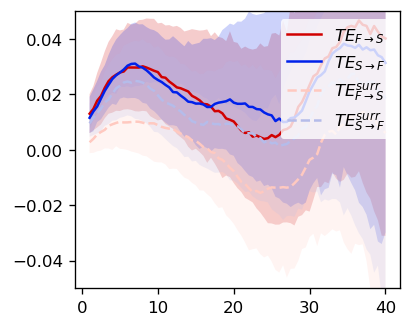

In [73]:
fig = visu.show_te_summary(te_data, yl=yl_set[0], xlb=None, ylb=None)

In [429]:
! mkdir figs/te_2d_mua_reduce

In [437]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

In [554]:
plt.close()

In [ ]:
import os
from tqdm import tqdm

cw_pair = [
    [1, 0], [1, 2], [1, 4], [1, 6],
    [2, 0], [2, 2], [2, 8], [2, 10],
    [3, 0], [3, 2], [3, 4], [3, 6],
    [4, 0], [4, 2], [4, 5], [4, 7],
    [5, 0], [5, 4], [5, 10], [5, 14],
    [6, 0], [6, 4], [6, 10], [6, 14],
    [7, 0], [7, 10],
    [8, 0], [8, 2], [8, 13], [8, 15]
]

# fig_bck, coords = gen_background()
wl = 0.01

data_dir = "./data/te_2d_mua"
fdir = "./figs/te_2d_mua_reduce"

xl_fit = [5, 41]
xl_show = [0, 41]

yl_set = [[0, 0], [0, 0]]
cid_prv = 1
wid_prv_set = []
for cid, wid in tqdm(cw_pair + [[-1, -1]]):
    # cumulate figs and set ylim
    if cid != cid_prv:
        for wid_prv in wid_prv_set:
            
            # te_data = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid_prv, wid_prv)))
            
            te_data_2d = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid_prv, wid_prv)))
            te_data = utils.reduce_te_2d(te_data_2d)
            
            nc = cid_prv-1
            nw = orders.index(wid_prv)
            c = coords[nc][nw]
            
            fig = visu.show_te_summary(te_data, yl=yl_set[0], xlb=None, ylb=None, xl=xl_show)
            visu.draw_freq_indicator(cid_prv, yl=yl_set[0])
            visu.draw_cfc_indicator(cid_prv, yl=yl_set[0])
            visu.draw_syn_indicator(yl_set[0])
            
            plt.savefig(os.path.join(fdir, "te_%d%02d.png"%(cid_prv, wid_prv)), bbox_inches="tight")
            plt.clf()
            
            fig = visu.show_te_summary(te_data, yl=yl_set[1], subtract_surr=True, xlb=None, ylb=None, xl=xl_show)
            visu.draw_freq_indicator(cid_prv, yl=yl_set[1])
            visu.draw_cfc_indicator(cid_prv, yl=yl_set[1])
            visu.draw_syn_indicator(yl_set[1])
            plt.savefig(os.path.join(fdir, "te_subt_%d%02d.png"%(cid_prv, wid_prv)), bbox_inches="tight")
            plt.clf()
            
        wid_prv_set = []
        cid_prv = cid
        yl_set = [[0, 0], [0, 0]]
        
    if cid == -1: continue
    
    # te_data = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid, wid)))
    
    te_data_2d = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid, wid)))
    te_data = utils.reduce_te_2d(te_data_2d)
    
    fig = visu.show_te_summary(te_data, xl=xl_fit)
    yl = fig.gca().get_ylim()
    if yl[0] < yl_set[0][0]: yl_set[0][0] = yl[0]
    if yl[1] > yl_set[0][1]: yl_set[0][1] = yl[1]
    fig.clf()
    
    fig = visu.show_te_summary(te_data, subtract_surr=True, xl=xl_fit)
    yl = fig.gca().get_ylim()
    if yl[0] < yl_set[1][0]: yl_set[1][0] = yl[0]
    if yl[1] > yl_set[1][1]: yl_set[1][1] = yl[1]
    fig.clf()
    
    plt.close()
    wid_prv_set.append(wid)
    
# fig_bck.show()
# plt.close()

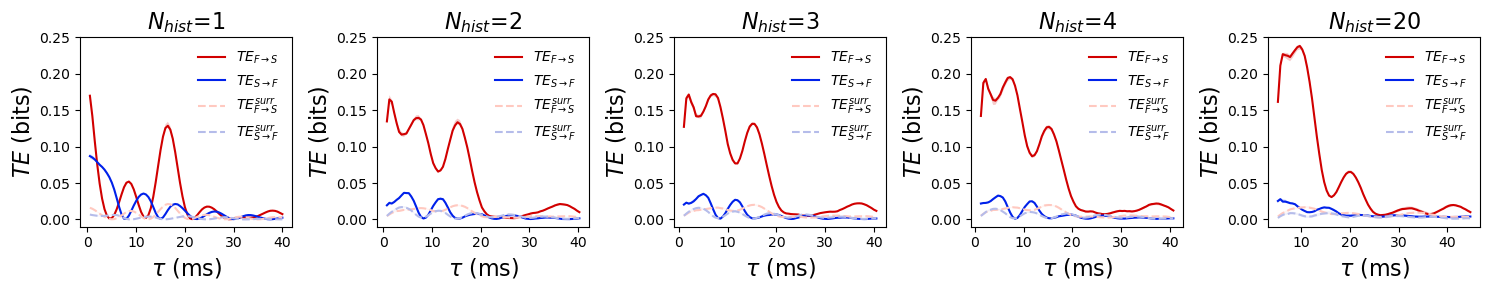

In [106]:
num_pt = [1, 2, 3, 4, 20]
plt.figure(figsize=(15, 3))
for n in range(5):
    
    te_data = utils.load_pickle("./te_multi_hist/te_510(%d).pkl"%(num_pt[n]))
    
    plt.subplot(1,5,n+1)
    fig = visu.show_te_summary(te_data, figsize=None, yl=(-0.01, 0.25), title=r"$N_{hist}$=%d"%(num_pt[n]))

plt.tight_layout()
plt.show()

In [561]:
fig_dir

'./figs/te_2d_mua_reduce/'

In [ ]:
od.get_motif_labels()[2]

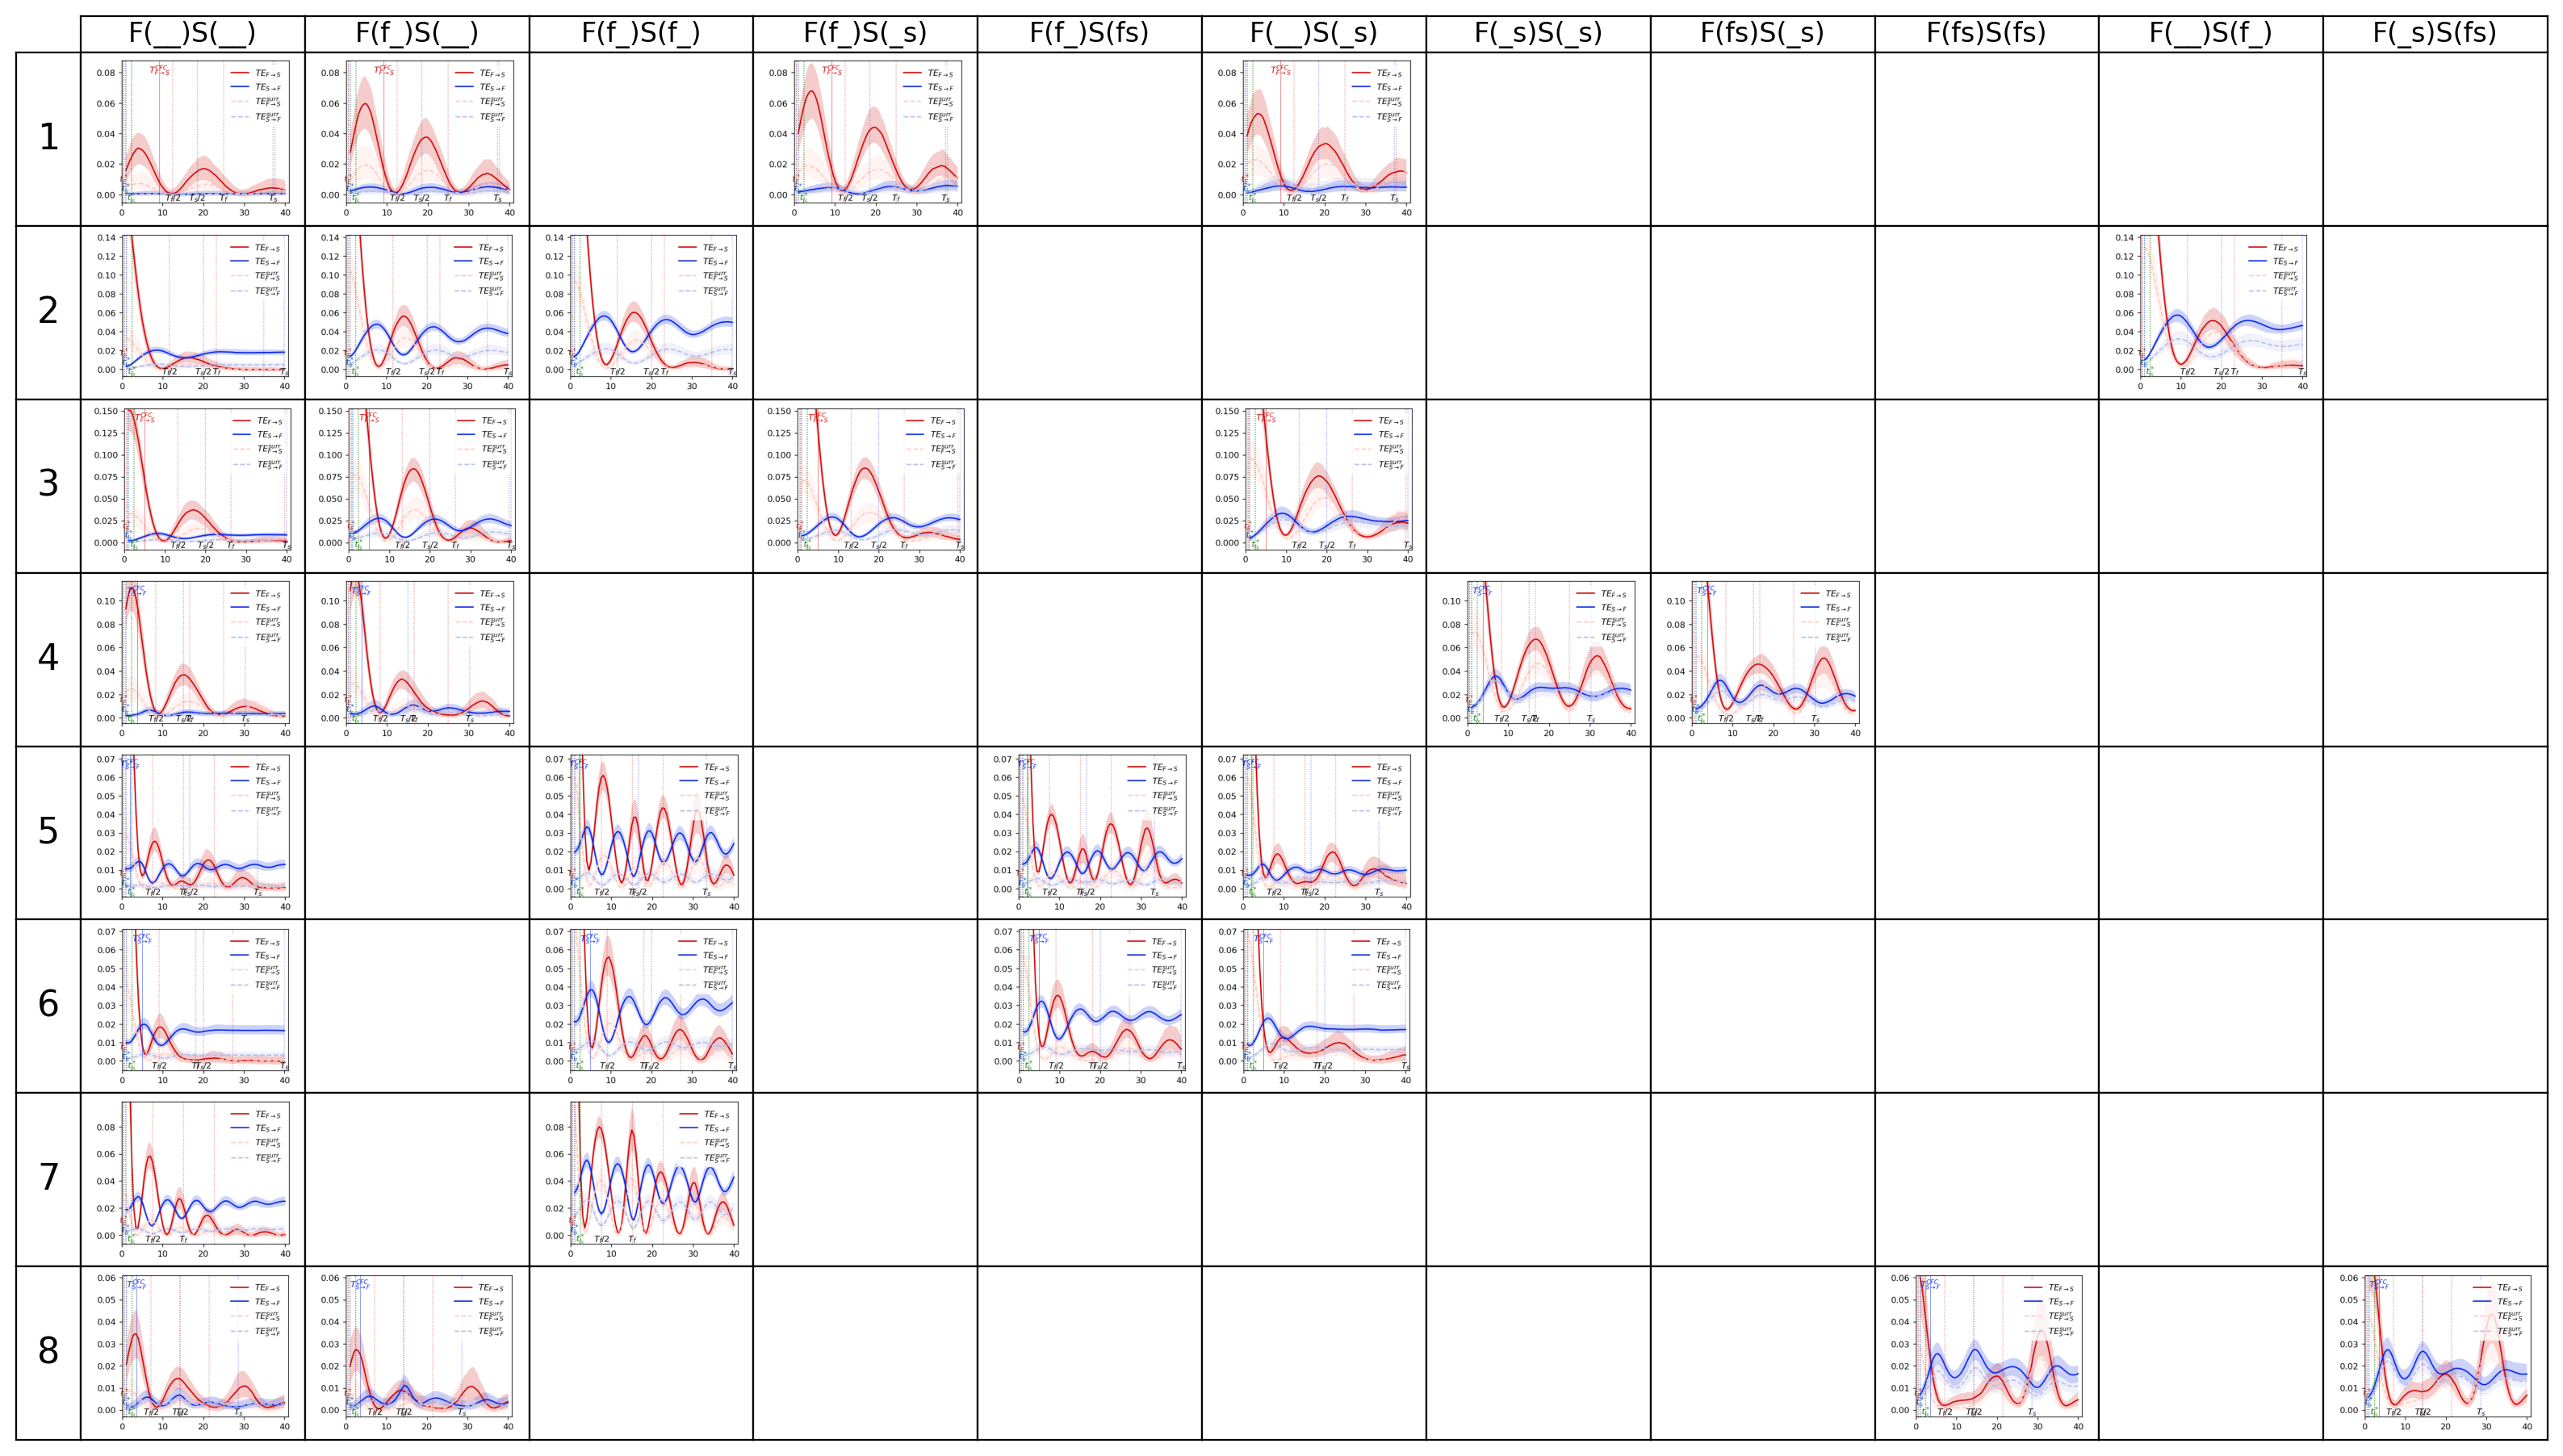

In [562]:
fig_dir = "./figs/te_2d_mua_reduce/"
# tag = "_subt"
tag = ""

wl = 0.002

fig_bck, coords = gen_background()
for cid, wid in cw_pair:
    nc = cid-1
    nw = orders.index(wid)
    
    fname = os.path.join(fig_dir, "te%s_%d%02d.png"%(tag, cid, wid))
    im_te = Image.open(fname)
    
    c = coords[nc][nw]
    fig_bck.add_axes([c[0]+wl, c[1]+wl, c[2]-2*wl, c[3]-2*wl])
    plt.sca(fig_bck.axes[-1])
    plt.imshow(im_te)
    plt.axis("off")
    
plt.savefig(os.path.join(fig_dir, "summary%s.png"%(tag)), dpi=400, bbox_inches="tight")

In [ ]:
import os
from tqdm import tqdm

cw_pair = [
    [1, 0], [1, 2], [1, 4], [1, 6],
    [2, 0], [2, 2], [2, 8], [2, 10],
    [3, 0], [3, 2], [3, 4], [3, 6],
    [4, 0], [4, 2], [4, 5], [4, 7],
    [5, 0], [5, 4], [5, 10], [5, 14],
    [6, 0], [6, 4], [6, 10], [6, 14],
    [7, 0], [7, 10],
    [8, 0], [8, 2], [8, 13], [8, 15]
]

# fig_bck, coords = gen_background()
wl = 0.01

data_dir = "./data/spec"
fdir = "./figs/spec"

xl_fit = [5, 80]
xl_show = [5, 80]

yl_set = [[0, 0], [0, 0]]
cid_prv = 1
wid_prv_set = []
for cid, wid in tqdm(cw_pair + [[-1, -1]]):
    # cumulate figs and set ylim
    if cid != cid_prv:
        for wid_prv in wid_prv_set:
            
            # te_data = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid_prv, wid_prv)))
            
            spec_data = utils.load_pickle(os.path.join(data_dir, "spec_%d%02d.pkl"%(cid_prv, wid_prv)))
            
            nc = cid_prv-1
            nw = orders.index(wid_prv)
            c = coords[nc][nw]
            
            fig = visu.show_spec_summary(spec_data, yl=yl_set[0], xlb=None, ylb=None, xl=xl_show)
            plt.savefig(os.path.join(fdir, "spec_%d%02d.png"%(cid_prv, wid_prv)), bbox_inches="tight")
            plt.clf()
            
        wid_prv_set = []
        cid_prv = cid
        yl_set = [[0, 0], [0, 0]]
        
    if cid == -1: continue
    
    spec_data = utils.load_pickle(os.path.join(data_dir, "spec_%d%02d.pkl"%(cid, wid)))
    
    fig = visu.show_spec_summary(spec_data, xl=xl_fit)
    yl = fig.gca().get_ylim()
    if yl[0] < yl_set[0][0]: yl_set[0][0] = yl[0]
    if yl[1] > yl_set[0][1]: yl_set[0][1] = yl[1]
    fig.clf()
    
    wid_prv_set.append(wid)
    
fig_bck.show()

plt.clf()

In [ ]:
fig_dir = "./figs/spec/"
tag = ""

wl = 0.002

fig_bck, coords = gen_background()
for cid, wid in cw_pair:
    nc = cid-1
    nw = orders.index(wid)
    
    fname = os.path.join(fig_dir, "spec_%d%02d.png"%(cid, wid))
    im_te = Image.open(fname)
    
    c = coords[nc][nw]
    fig_bck.add_axes([c[0]+wl, c[1]+wl, c[2]-2*wl, c[3]-2*wl])
    plt.sca(fig_bck.axes[-1])
    plt.imshow(im_te)
    plt.axis("off")
    
plt.savefig(os.path.join(fig_dir, "summary.png"), dpi=400, bbox_inches="tight")

In [396]:
fpeaks = [[27, 40],
          [25, 43],
          [25, 38],
          [33, 60],
          [30, 66],
          [25, 55],
          [-1, 66],
          [35, 70]]

In [380]:
cid = 3

wid = 0

spec_data = utils.load_pickle("./data/spec/spec_%d%02d.pkl"%(cid, wid))
te_data_2d = utils.load_pickle("./data/te_2d/te_%d%02d.pkl"%(cid, wid))
te_data = utils.reduce_te_2d(te_data_2d)

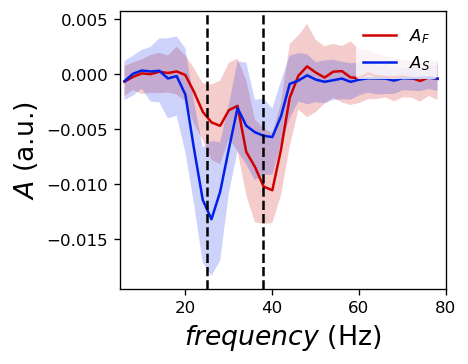

In [381]:
fig = visu.show_spec_summary(spec_data, xl=(5, 80))
yl = fig.gca().get_ylim()

for f0 in fpeaks[cid-1]:
    plt.vlines(f0, yl[0], yl[1], color='k', linestyle='--')

plt.ylim(yl)
plt.show()

In [414]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

In [382]:
te_data_2d = utils.load_pickle("./data/te_2d/te_%d%02d.pkl"%(cid, wid))
te_data = utils.reduce_te_2d(te_data_2d)

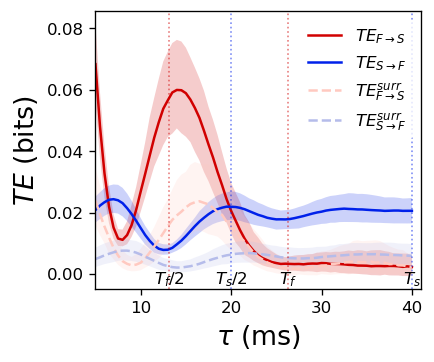

In [415]:
fig = visu.show_te_summary(te_data, xl=(5, 41))
yl = fig.gca().get_ylim()
visu.draw_freq_indicator(cid, yl)

# for i in range(2):
# plt.vlines(1e3/fpeaks[cid-1][0], yl[0], yl[1], color='k', linestyle='--')
# plt.vlines(1e3/fpeaks[cid-1][0]/2, yl[0], yl[1], color='k', linestyle='--')

# plt.vlines(1e3/fpeaks[cid-1][1], yl[0], yl[1], color='k', linestyle='--')
# plt.vlines(1e3/fpeaks[cid-1][1]/2, yl[0], yl[1], color='k', linestyle='--')

# for f0 in fpeaks[cid-1]:
    # plt.vlines(1e3/f0, yl[0], yl[1], color='k', linestyle='--')


In [412]:


def draw_freq_indicator(cid, yl=None):
    if yl is None: yl = [0, 1]
    
    fopt = dict(va="center", ha="center", fontsize=10)
    lopt = dict(linestyle=":", linewidth=1, alpha=0.5)
    tp_labels = [r"$T_s/2$", r"$T_s$", r"$T_f/2$", r"$T_f$"]
    
    for tp in range(2):
        f0 = fpeaks[cid-1][tp]
        plt.vlines(1e3/f0, yl[0], yl[1], color=cs[1-tp], **lopt)
        plt.vlines(1e3/f0/2, yl[0], yl[1], color=cs[1-tp], **lopt)
        
        h = yl[0] + (yl[1]-yl[0])/30
        plt.text(1e3/f0/2, h, tp_labels[2*tp], **fopt)
        plt.text(1e3/f0, h, tp_labels[2*tp+1], **fopt)

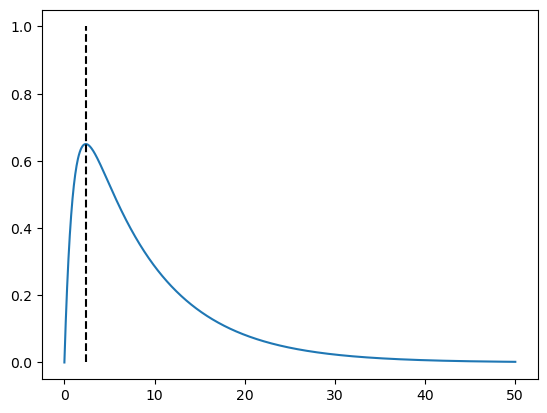

In [448]:
tau2 = 1
tau1 = 8
tp = tau1*tau2 / (tau2 - tau1) * np.log(tau2/tau1)

t = np.linspace(0, 50, 1000)
g = (np.exp(-t/tau1) - np.exp(-t/tau2))

plt.plot(t, g)
plt.vlines(tp, 0, 1, color='k', linestyle="--")
plt.show()

In [465]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

0.5159883447111155
1.0058986952713127
2.3765046190626693


(0.0, 40.0)

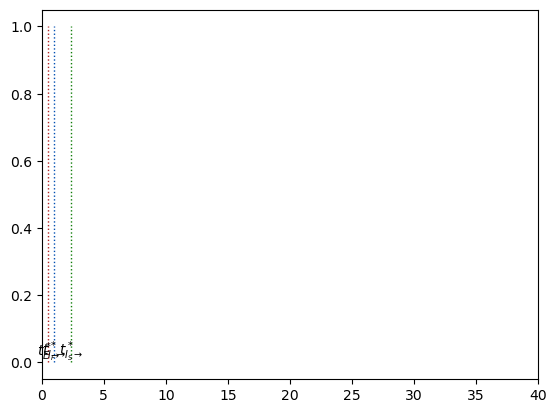

In [467]:
visu.draw_syn_indicator()
plt.xlim([0, 40])

In [379]:
fpeaks[cid-1]

[35, 70]